# Hello Credit

Version, 09 Nov 2023

##### *Credit risk is the probability that a borrower will not pay back a loan in accordance with the terms of the credit agreement.*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bloomberg import BDH, BDP, BDS, BQL

from quantstats import *
extend_pandas()

### Comparative Analysis

* Valuation Multiples - Core Deposit Premium, Latest Book Value, Price to Book Ratio
* Market Metrics - 1-yr Implied Volatility, 5 Year Bid CDS Spread, Bid OAS, Dividend Yield
* Credit Ratio - Efficiency Ratio, Liquidity Coverage Ratio, NPA/TA, ROA, ROE, TCE Ratio

In [18]:
fields = ["RX541", "RR020", "RR903","VL172", "DV012", "RR143", "S4528", "RR214", "RR028", "R6960", "RR880"]
tickers = ['NED SJ Equity', 'ABG SJ Equity', 'FSR SJ Equity', 'SBK SJ Equity','CPI SJ Equity']

In [22]:
df = BDP(tickers, fields)
df.replace("None", np.nan, inplace=True)
df = df.pivot_table(columns='security').dropna()

In [29]:
df_h = BDH(tickers, fields, '20190101', '20201231')

In [42]:
df_h = df_h.bfill().ffill()

In [54]:
perf = df_h.to_returns().zscore().clip(-2, 2).cumsum()

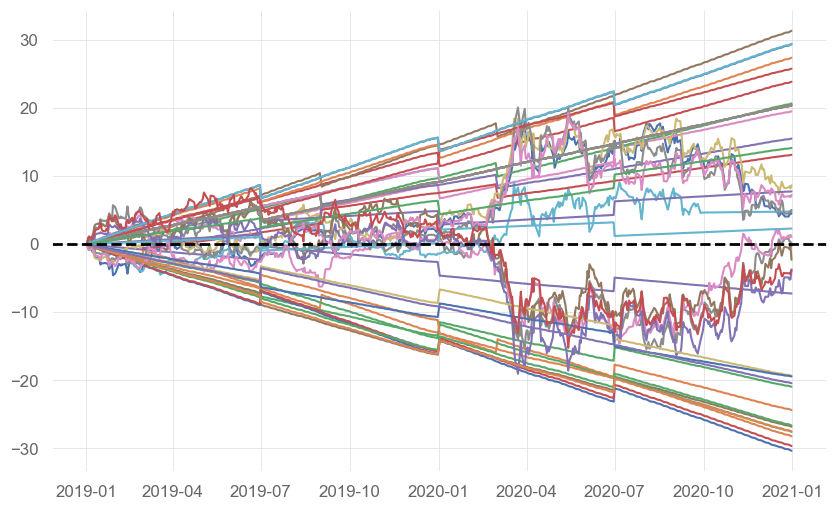

In [55]:
plt.plot(perf)
plt.axhline(0, color='black', linestyle='--', lw=2) 

In [65]:
from statsmodels.api import OLS, add_constant

In [ ]:
def kmv_merton(asset_value, asset_volatility, debt_value, risk_free_rate, time_horizon):
    distance_to_default = (np.log(asset_value / debt_value) + (risk_free_rate + 0.5 * asset_volatility**2) * time_horizon) / (asset_volatility * np.sqrt(time_horizon))
    return distance_to_default

# Example values
distance = kmv_merton(1000000, 0.25, 500000, 0.03, 1)
print("KMV-Merton Distance to Default:", distance)


In [ ]:
import numpy as np
from scipy.stats import norm

# Constants given in the formula
STD = 100000  # Short-term debt (example value)
LTD = 200000  # Long-term debt (example value)
A = 500000    # Current asset value (example value)
sigma_A = 0.25  # Asset volatility (example value)
r = 0.05      # Risk-free rate (example value)
T = 1         # Time horizon in years (example value)

# Calculating the default point (DPT)
DPT = STD + 0.5 * LTD

# Calculating d1 and d2 using the given formulas
d1 = (np.log(A / DPT) + (r + sigma_A ** 2 / 2) * T) / (sigma_A * np.sqrt(T))
d2 = d1 - sigma_A * np.sqrt(T)

# Calculating the firm value (FV) at time T
FV = A * norm.cdf(d1) - DPT * np.exp(-r * T) * norm.cdf(d2)

# Calculating the Expected Default Frequency (EDF)
EDF = norm.cdf(-d2)

FV, d1, d2, EDF


In [ ]:
import numpy as np
from scipy.stats import norm

# Data provided in the image
stock_prices = np.array([49.05, 37.10, 27.23, 30.83, 41.65, 31.27, 31.18, 30.58, 
                         34.01, 28.64, 25.13, 28.31, 26.21])
shares = 303.6  # in millions

# Financial statement data for 2021 and 2022
assets = np.mean([2.4726, 3.4993]) * 1e3  # Converting to millions
current_liabilities = np.mean([1.3427, 1.3547]) * 1e3
non_current_liabilities = np.mean([0.6932, 0.5421]) * 1e3
equity = np.mean([0.6932, 0.5421]) * 1e3

# Calculating the market capitalization
market_cap = stock_prices[-1] * shares  # Most recent stock price times shares

# Assuming a risk-free rate of 2% (0.02)
risk_free_rate = 0.02
time_horizon = 1  # 1 year

# Estimating the equity volatility (σ_E) using the standard deviation of the stock prices
equity_volatility = np.std(stock_prices) / np.mean(stock_prices)

# Estimating the asset volatility (σ_A). Here we need the asset value, but we'll use a simplification
# by assuming equity volatility is proportional to asset volatility, which is a rough approximation.
asset_volatility = equity_volatility * (market_cap / assets)

# Calculating the default point (DPT)
default_point = current_liabilities + 0.5 * non_current_liabilities  # A common approximation

# Calculating d1 and d2
d1 = (np.log(assets / default_point) + (risk_free_rate + asset_volatility ** 2 / 2) * time_horizon) / (asset_volatility * np.sqrt(time_horizon))
d2 = d1 - asset_volatility * np.sqrt(time_horizon)

# Calculating the Expected Default Frequency (EDF)
EDF = norm.cdf(-d2)

market_cap, asset_volatility, default_point, equity_volatility, d1, d2, EDF
